# Visualize Training Results

6/30/18: Over the past few weeks, I ran a few experiments regarding the learning rate and the baseline experiments for CNN with LOO on STFT 5000/2500 new TNG patients.

We want to baseline these models and then proceed with training with augmented datasets.



In [1]:
%matplotlib inline
# import basic functionality / libs
import sys
import os
import numpy as np
import pandas as pd
import json
import scipy
import pickle

# Import magic commands for jupyter notebook 
# - autoreloading a module
# - profiling functions for memory usage and scripts
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
%load_ext memory_profiler

sys.path.append('../../../')
import dnn
from dnn.base.utils.log_error import initialize_logger
from dnn.base.constants.config import Config

# import basic plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
patient = 'id001_bt'

training_resultsdir = '/Users/adam2392/Downloads/dnn_results/exp_win5000_step2500_lr1e-1/'

# set configurations
patients = ['id001_bt',
           'id002_sd', 'id003_cm', 'id004_bj', 
           'id005_ft', 'id006_mr', 'id007_rd',
           'id008_dmc', 'id009_ba', 'id010_cmn',
           'id011_gr', 'id012_fl', 'id013_lk', 'id014_vc',
           'id015_gjl', 'id016_lm', 'id017_mk',
           'id018_lo', 'id019_rg', 'id020_lma',
            
#             'id001_ac', 'id002_cj', 'id008_gc', 'id010_js', 
#             'id011_ml', 'id012_pc', 'id013_pg'
           ]

#  where to find the raw data for this patient
rawdatadir = os.path.join('/Volumes/ADAM LI/rawdata/',  patient)

output_folder = os.path.join(os.path.expanduser("~"), 
                    'Documents', 'figures', 
                    'dnn_newtng_preliminary_results')

# configuration and plotting
config = Config(output_base=output_folder) 
config.figures.MATPLOTLIB_BACKEND="qt5" #"Qt4Agg" #"inline"
config.figures.SHOW_FLAG=True

# Import Baseline Data

7/1/18: This learning rate baseline was at 1e-3

/Users/adam2392/Downloads/dnn_results/exp_win5000_step2500_lr1e-1/id001_bt/output/loobasecnn_history.pkl
dict_keys(['val_acc', 'acc', 'lr', 'val_loss', 'loss'])
150
/Users/adam2392/Downloads/dnn_results/exp_win5000_step2500_lr1e-1/id001_bt/output/loobasecnn_history.pkl
dict_keys(['val_acc', 'acc', 'lr', 'val_loss', 'loss'])
150
/Users/adam2392/Downloads/dnn_results/exp_win5000_step2500_lr1e-1/id001_bt/output/loobasecnn_history.pkl
dict_keys(['val_acc', 'acc', 'lr', 'val_loss', 'loss'])
150
/Users/adam2392/Downloads/dnn_results/exp_win5000_step2500_lr1e-1/id001_bt/output/loobasecnn_history.pkl
dict_keys(['val_acc', 'acc', 'lr', 'val_loss', 'loss'])
150
/Users/adam2392/Downloads/dnn_results/exp_win5000_step2500_lr1e-1/id001_bt/output/loobasecnn_history.pkl
dict_keys(['val_acc', 'acc', 'lr', 'val_loss', 'loss'])
150
/Users/adam2392/Downloads/dnn_results/exp_win5000_step2500_lr1e-1/id001_bt/output/loobasecnn_history.pkl
dict_keys(['val_acc', 'acc', 'lr', 'val_loss', 'loss'])
150
/Users/ada

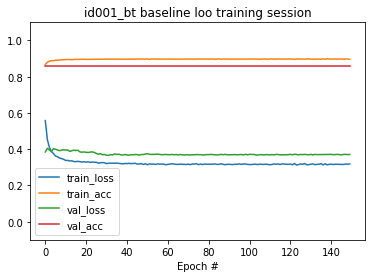

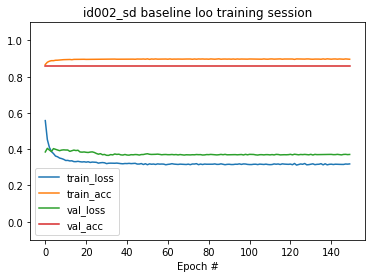

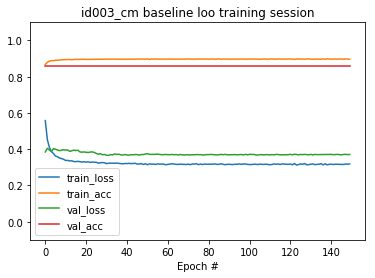

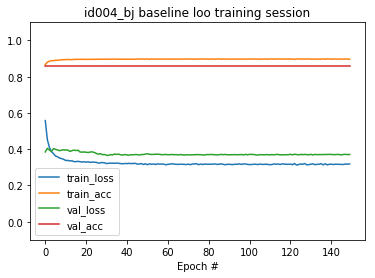

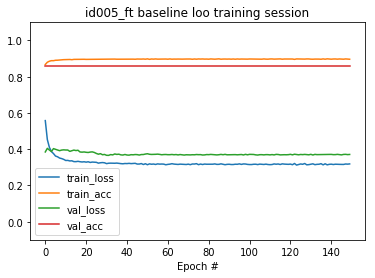

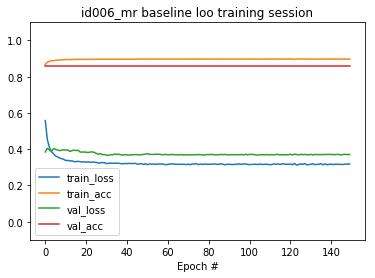

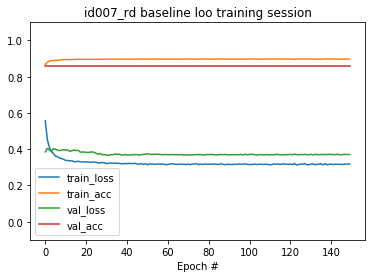

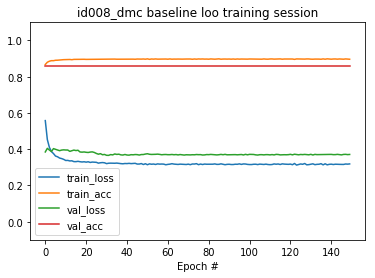

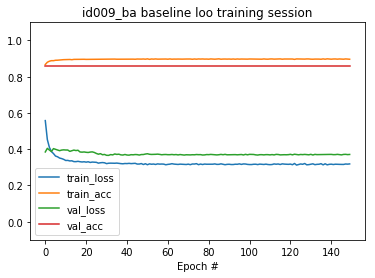

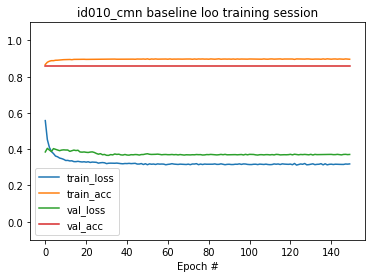

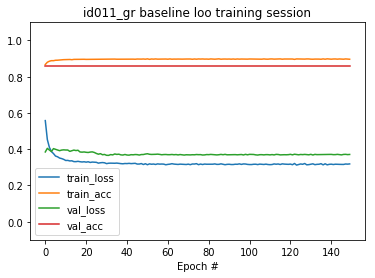

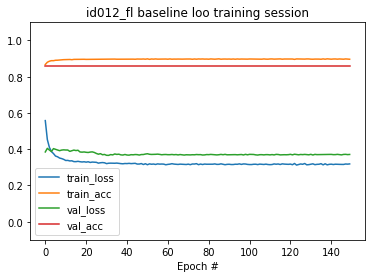

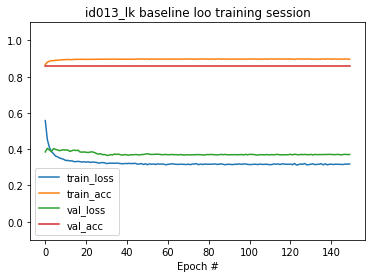

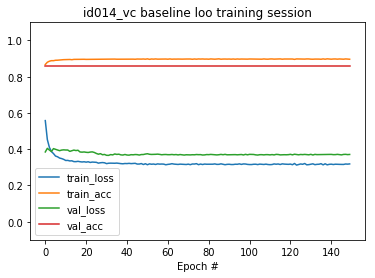

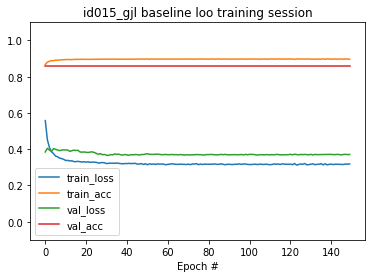

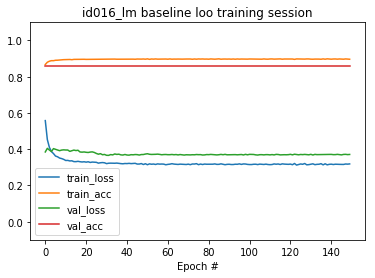

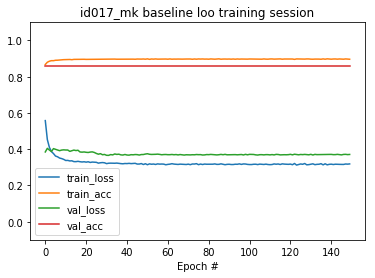

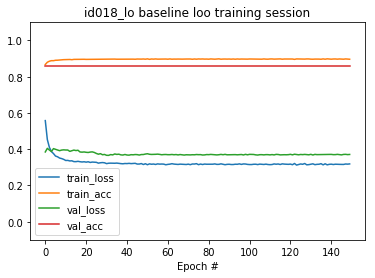

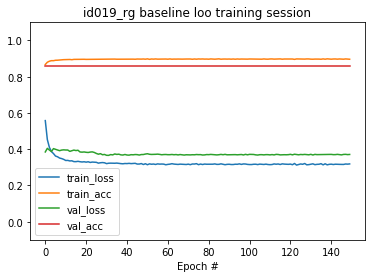

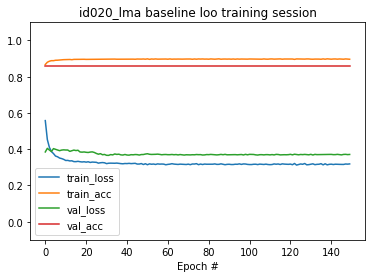

In [3]:
N = np.arange(0, 150)
loss = np.zeros((len(patients), 150))
acc = np.zeros(loss.shape)
val_acc = np.zeros(loss.shape)
val_loss = np.zeros(loss.shape)

# go through all patients
for idx, pat in enumerate(patients):
    # real data results directory
    resultsdir = os.path.join(training_resultsdir, patient, 'output')
    resultfiles = [f for f in os.listdir(resultsdir) if f.endswith('.pkl')]
    
    # extract data from each training session
    for _file in resultfiles:
        histfile = os.path.join(resultsdir, _file)
        print(histfile)
        # load in the history file
        with open(histfile, "rb") as f:
            history = pickle.load(f)
        print(history.keys())
        print(len(history['loss']))
        
        loss[idx, :] = history['loss']
        acc[idx, :] = history['acc']
        val_acc[idx,:] = history['val_acc']
        val_loss[idx,:] = history['val_loss']
        
for idx, pat in enumerate(patients):
    plt.figure()
    plt.title('{} baseline loo training session'.format(pat))
    plt.plot(N, loss[idx,:], label="train_loss")
    plt.plot(N, acc[idx,:], label="train_acc")
    plt.plot(N, val_loss[idx,:], label="val_loss")
    plt.plot(N, val_acc[idx,:], label="val_acc")
    plt.xlabel('Epoch #')
    plt.ylim([-0.1, 1.1])
    plt.legend()

# Look at It For LR = 1e-2

In [16]:
patient = 'id001_bt'

training_resultsdir = '/Users/adam2392/Downloads/dnn_results/exp_win5000_step2500_lr1e-4/'

# set configurations
patients = ['id001_bt',
           'id002_sd', 'id003_cm', 'id004_bj', 
           'id005_ft', 'id006_mr', 'id007_rd',
           'id008_dmc', 'id009_ba', 'id010_cmn',
           'id011_gr', 'id012_fl', 'id013_lk', 'id014_vc',
           'id015_gjl', 'id016_lm', 'id017_mk',
           'id018_lo', 'id019_rg', 'id020_lma',
                       'id001_ac', 'id002_cj', 'id008_gc', 'id010_js', 
            'id011_ml', 'id012_pc', 'id013_pg'
           ]

#  where to find the raw data for this patient
rawdatadir = os.path.join('/Volumes/ADAM LI/rawdata/',  patient)

output_folder = os.path.join(os.path.expanduser("~"), 
                    'Documents', 'figures', 
                    'dnn_newtng_preliminary_results')

# configuration and plotting
config = Config(output_base=output_folder) 
config.figures.MATPLOTLIB_BACKEND="qt5" #"Qt4Agg" #"inline"
config.figures.SHOW_FLAG=True

/Users/adam2392/Downloads/dnn_results/exp_win5000_step2500_lr1e-4/id001_bt/output/loobasecnn_history.pkl
dict_keys(['acc', 'loss', 'val_loss', 'val_acc', 'lr'])
150
/Users/adam2392/Downloads/dnn_results/exp_win5000_step2500_lr1e-4/id001_bt/output/loobasecnn_history.pkl
dict_keys(['acc', 'loss', 'val_loss', 'val_acc', 'lr'])
150
/Users/adam2392/Downloads/dnn_results/exp_win5000_step2500_lr1e-4/id001_bt/output/loobasecnn_history.pkl
dict_keys(['acc', 'loss', 'val_loss', 'val_acc', 'lr'])
150
/Users/adam2392/Downloads/dnn_results/exp_win5000_step2500_lr1e-4/id001_bt/output/loobasecnn_history.pkl
dict_keys(['acc', 'loss', 'val_loss', 'val_acc', 'lr'])
150
/Users/adam2392/Downloads/dnn_results/exp_win5000_step2500_lr1e-4/id001_bt/output/loobasecnn_history.pkl
dict_keys(['acc', 'loss', 'val_loss', 'val_acc', 'lr'])
150
/Users/adam2392/Downloads/dnn_results/exp_win5000_step2500_lr1e-4/id001_bt/output/loobasecnn_history.pkl
dict_keys(['acc', 'loss', 'val_loss', 'val_acc', 'lr'])
150
/Users/ada

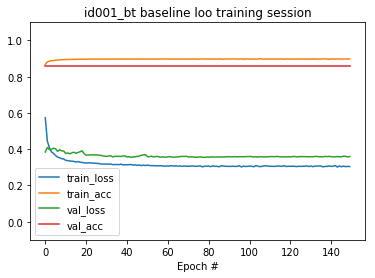

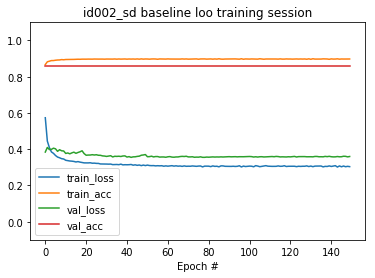

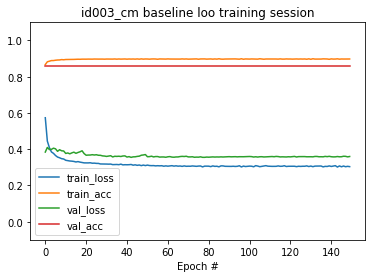

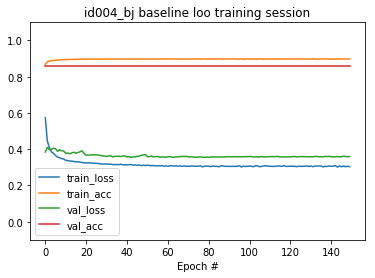

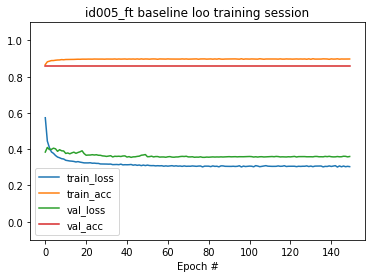

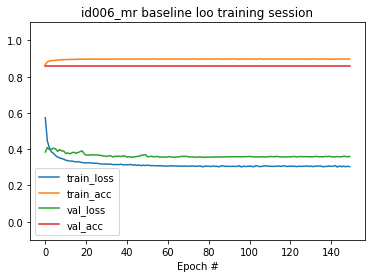

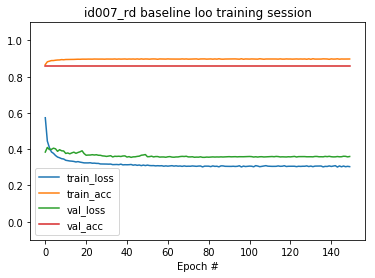

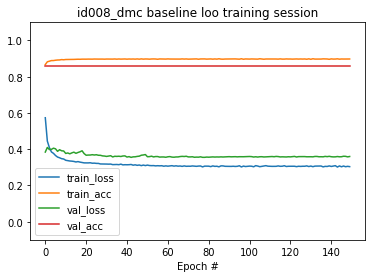

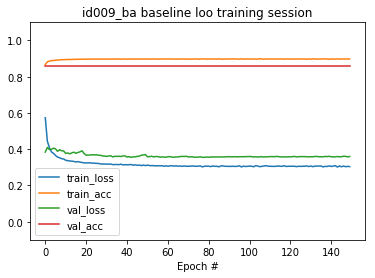

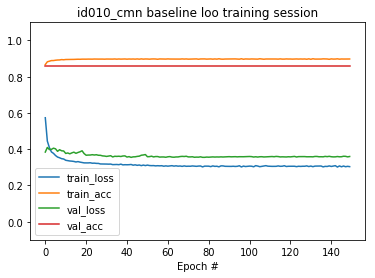

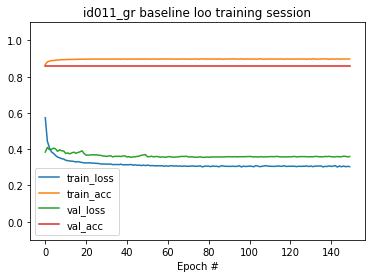

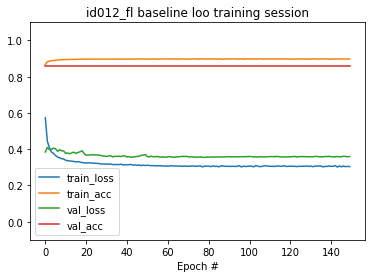

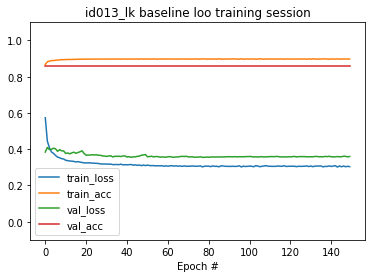

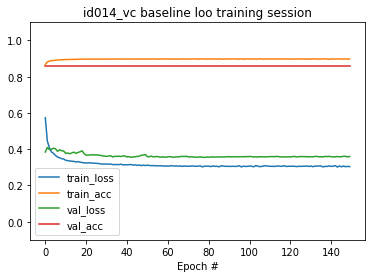

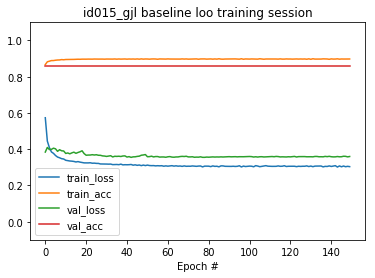

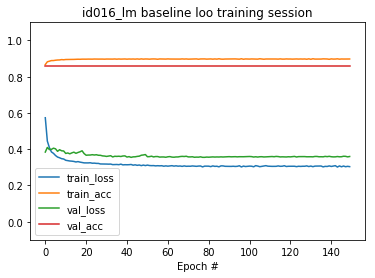

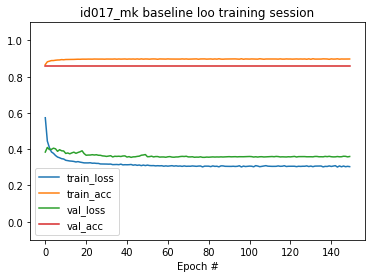

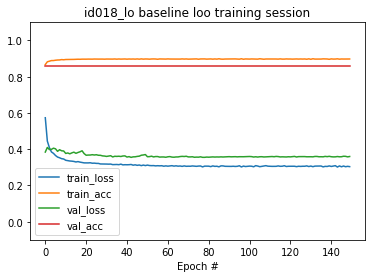

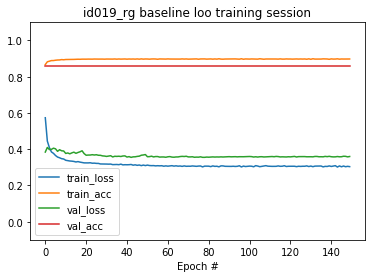

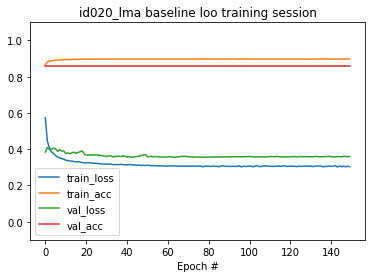

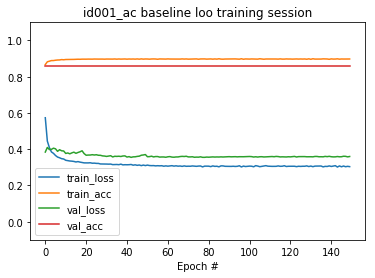

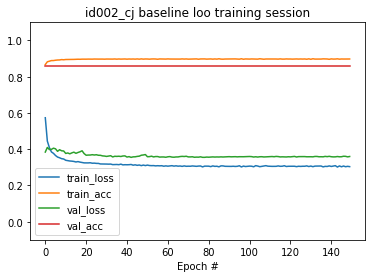

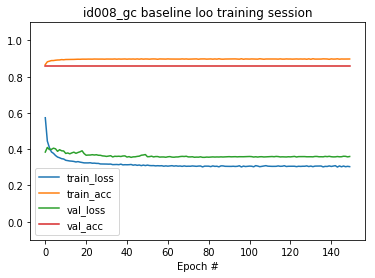

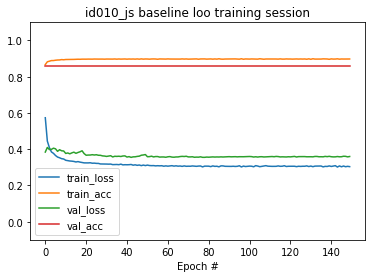

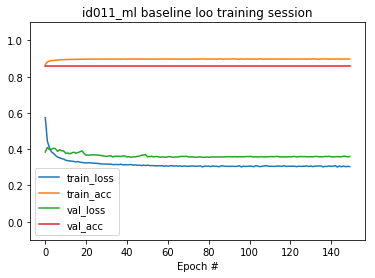

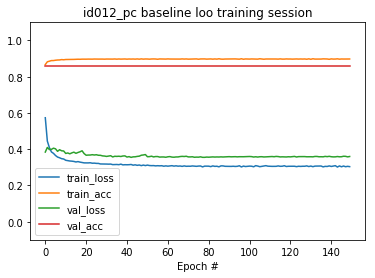

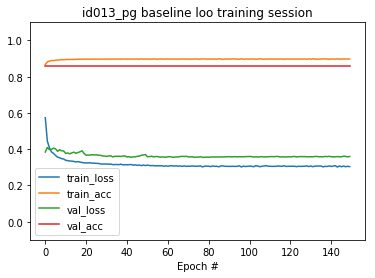

In [17]:
N = np.arange(0, 150)
loss = np.zeros((len(patients), 150))
acc = np.zeros(loss.shape)
val_acc = np.zeros(loss.shape)
val_loss = np.zeros(loss.shape)

# go through all patients
for idx, pat in enumerate(patients):
    # real data results directory
    resultsdir = os.path.join(training_resultsdir, patient, 'output')
    resultfiles = [f for f in os.listdir(resultsdir) if f.endswith('.pkl')]
    
    # extract data from each training session
    for _file in resultfiles:
        histfile = os.path.join(resultsdir, _file)
        print(histfile)
        # load in the history file
        with open(histfile, "rb") as f:
            history = pickle.load(f)
        print(history.keys())
        print(len(history['loss']))
        
        loss[idx, :] = history['loss']
        acc[idx, :] = history['acc']
        val_acc[idx,:] = history['val_acc']
        val_loss[idx,:] = history['val_loss']
        
for idx, pat in enumerate(patients):
    plt.figure()
    plt.title('{} baseline loo training session'.format(pat))
    plt.plot(N, loss[idx,:], label="train_loss")
    plt.plot(N, acc[idx,:], label="train_acc")
    plt.plot(N, val_loss[idx,:], label="val_loss")
    plt.plot(N, val_acc[idx,:], label="val_acc")
    plt.xlabel('Epoch #')
    plt.ylim([-0.1, 1.1])
    plt.legend()

# Visualize Exp001

/Users/adam2392/Downloads/dnn_results/exp001/id001_bt/output/loobasecnn_history.pkl
dict_keys(['acc', 'lr', 'val_acc', 'val_loss', 'loss'])
150
/Users/adam2392/Downloads/dnn_results/exp001/id001_bt/output/loobasecnn_history.pkl
dict_keys(['acc', 'lr', 'val_acc', 'val_loss', 'loss'])
150
/Users/adam2392/Downloads/dnn_results/exp001/id001_bt/output/loobasecnn_history.pkl
dict_keys(['acc', 'lr', 'val_acc', 'val_loss', 'loss'])
150
/Users/adam2392/Downloads/dnn_results/exp001/id001_bt/output/loobasecnn_history.pkl
dict_keys(['acc', 'lr', 'val_acc', 'val_loss', 'loss'])
150
/Users/adam2392/Downloads/dnn_results/exp001/id001_bt/output/loobasecnn_history.pkl
dict_keys(['acc', 'lr', 'val_acc', 'val_loss', 'loss'])
150
/Users/adam2392/Downloads/dnn_results/exp001/id001_bt/output/loobasecnn_history.pkl
dict_keys(['acc', 'lr', 'val_acc', 'val_loss', 'loss'])
150
/Users/adam2392/Downloads/dnn_results/exp001/id001_bt/output/loobasecnn_history.pkl
dict_keys(['acc', 'lr', 'val_acc', 'val_loss', 'loss

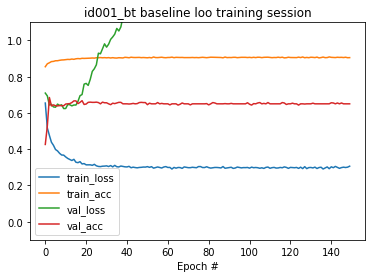

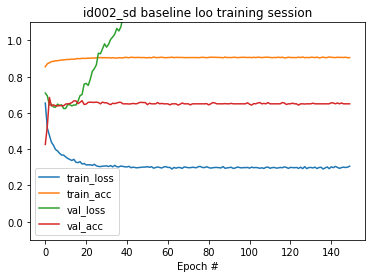

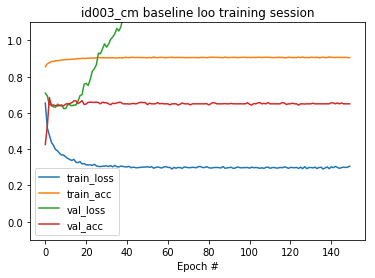

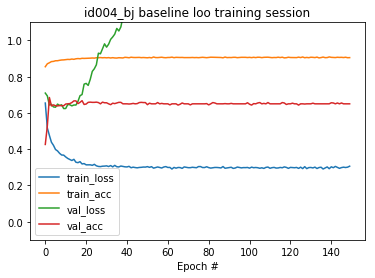

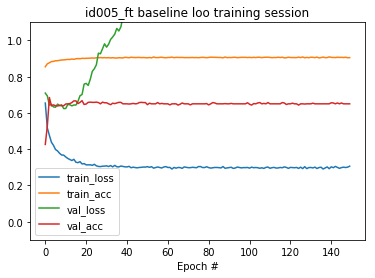

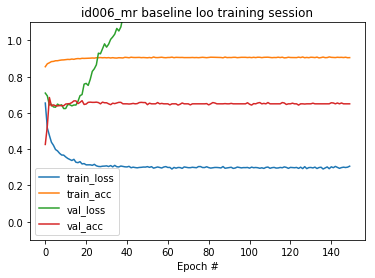

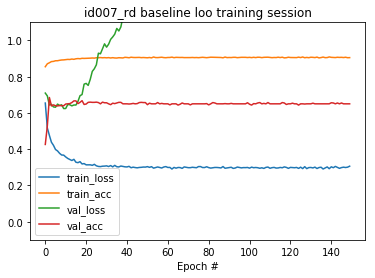

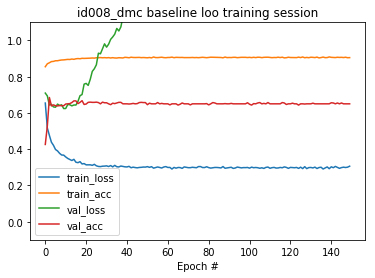

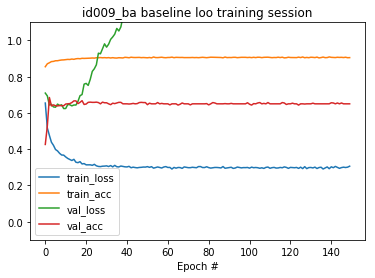

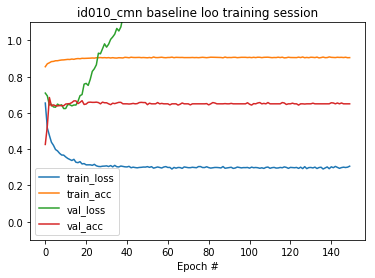

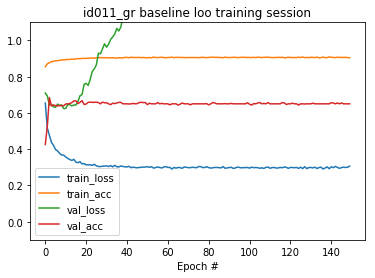

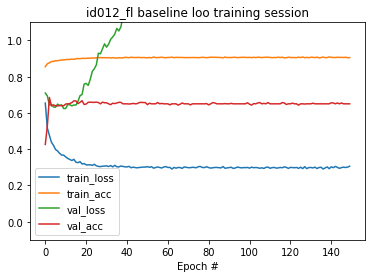

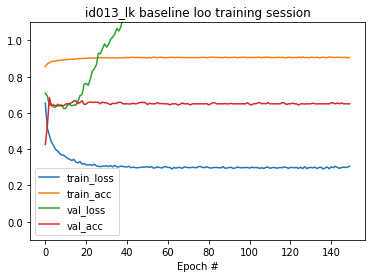

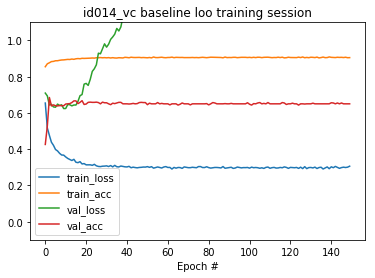

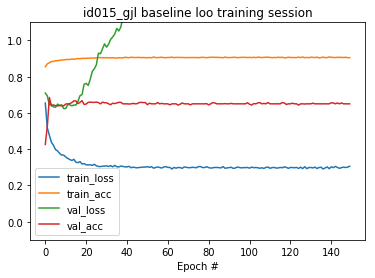

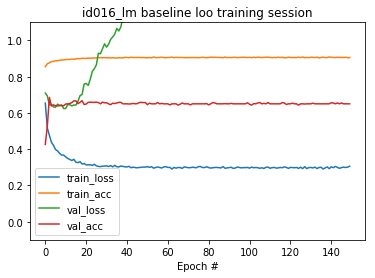

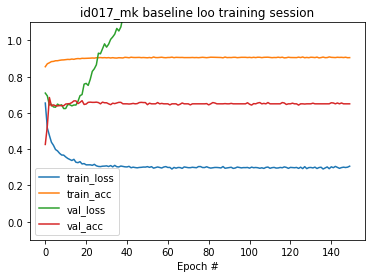

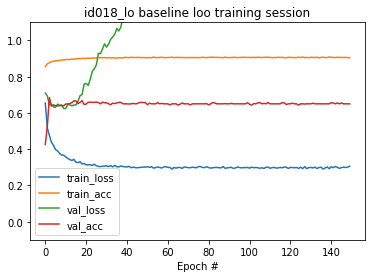

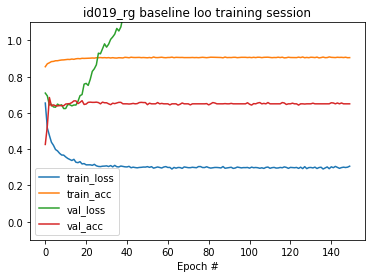

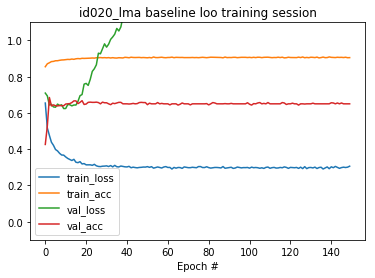

In [15]:
training_resultsdir = '/Users/adam2392/Downloads/dnn_results/exp001/'

# set configurations
patients = ['id001_bt',
           'id002_sd', 'id003_cm', 'id004_bj', 
           'id005_ft', 'id006_mr', 'id007_rd',
           'id008_dmc', 'id009_ba', 'id010_cmn',
           'id011_gr', 'id012_fl', 'id013_lk', 'id014_vc',
           'id015_gjl', 'id016_lm', 'id017_mk',
           'id018_lo', 'id019_rg', 'id020_lma']

#  where to find the raw data for this patient
rawdatadir = os.path.join('/Volumes/ADAM LI/rawdata/',  patient)

output_folder = os.path.join(os.path.expanduser("~"), 
                    'Documents', 'figures', 
                    'dnn_newtng_preliminary_results')

# configuration and plotting
config = Config(output_base=output_folder) 
config.figures.MATPLOTLIB_BACKEND="qt5" #"Qt4Agg" #"inline"
config.figures.SHOW_FLAG=True

N = np.arange(0, 150)
loss = np.zeros((len(patients), 150))
acc = np.zeros(loss.shape)
val_acc = np.zeros(loss.shape)
val_loss = np.zeros(loss.shape)

# go through all patients
for idx, pat in enumerate(patients):
    # real data results directory
    resultsdir = os.path.join(training_resultsdir, patient, 'output')
    resultfiles = [f for f in os.listdir(resultsdir) if f.endswith('.pkl')]
    
    # extract data from each training session
    for _file in resultfiles:
        histfile = os.path.join(resultsdir, _file)
        print(histfile)
        # load in the history file
        with open(histfile, "rb") as f:
            history = pickle.load(f)
        print(history.keys())
        print(len(history['loss']))
        
        loss[idx, :] = history['loss']
        acc[idx, :] = history['acc']
        val_acc[idx,:] = history['val_acc']
        val_loss[idx,:] = history['val_loss']
        
for idx, pat in enumerate(patients):
    plt.figure()
    plt.title('{} baseline loo training session'.format(pat))
    plt.plot(N, loss[idx,:], label="train_loss")
    plt.plot(N, acc[idx,:], label="train_acc")
    plt.plot(N, val_loss[idx,:], label="val_loss")
    plt.plot(N, val_acc[idx,:], label="val_acc")
    plt.xlabel('Epoch #')
    plt.ylim([-0.1, 1.1])
    plt.legend()